In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import plotly.plotly as py 
import plotly.graph_objs as go 

In [2]:
# Clean dataset, take only necessary columns, create new dataframes and save as csv

# File to Load
fastfood_to_load = "datasets/fast-food-restaurants/Datafiniti_Fast_Food_Restaurants.csv"
census_to_load = "datasets/us-census-demographic-data/acs2017_census_tract_data.csv"

# Read the CSV files
fastfood = pd.read_csv(fastfood_to_load)
census = pd.read_csv(census_to_load)

# Create FastFood dataset
ff_id = fastfood['id']
ff_name = fastfood['name']
ff_state = fastfood['province']
dict1 = {'state': ff_state, 'name': ff_name}  
fastfood_df = pd.DataFrame(dict1) 

# Output File (CSV)
output_ff_file = "output_data/fastfood.csv"

# Write DF to a CSV
fastfood_df.to_csv(output_ff_file, sep=';', encoding='utf-8')


# Create Census dataset
# Columns: State, Income, Professional, Unemployment
us_id = census['TractId']
us_state = census['State']
us_income = census['Income']
us_professional = census['Professional']
us_unemployment = census['Unemployment']
dict2 = {'state': us_state, 'income': us_income, 'professional': us_professional, 'unemployment': us_unemployment}
census_df = pd.DataFrame(dict2)

# Output File (CSV)
output_us_file = "output_data/census.csv"

# Write output to the file
census_df.to_csv(output_us_file, sep=';', encoding='utf-8')


In [3]:
# This is required to change state names into abbreviations in order to merge datasets later
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [4]:
fastfood_df.head()

,state,name
0,LA,SONIC Drive In
1,LA,SONIC Drive In
2,TN,Taco Bell
3,TN,Arby's
4,GA,Steak 'n Shake


In [5]:
# Change state abbreviation to state name
census_df = census_df.replace({"state": us_state_abbrev})

In [6]:
census_df.head()

,state,income,professional,unemployment
0,AL,67826.0,38.5,4.6
1,AL,41287.0,30.5,3.4
2,AL,46806.0,27.9,4.7
3,AL,55895.0,29.0,6.1
4,AL,68143.0,48.8,2.3


## Questions:
1. most popular FFR by state
2. correlation between white collar jobs and FFR
3. correlation between unemployment rate and FFR
4. correlation between income and FFR

In [7]:
# Clean NaNs from datasets
census_df = census_df.dropna()
fastfood_df = fastfood_df.dropna()

In [8]:

## ffbs_df most popular fastfood in each state. 


ffbs_df = fastfood_df.groupby('state', as_index=False).agg({'name': lambda x: x.value_counts().index[0]})

ffbs_df.columns = ['state', 'most_popular_fastfood']
ffbs_df.head()

,state,most_popular_fastfood
0,AK,Subway
1,AL,Taco Bell
2,AR,McDonald's
3,AZ,McDonald's
4,CA,McDonald's


In [9]:
# number of FFRs in each state
ff_qty_df = fastfood_df.groupby('state', as_index=False).count()
ff_qty_df.columns = ['state', 'fastfood_qty']
ff_qty_df.head()

,state,fastfood_qty
0,AK,16
1,AL,6
2,AR,102
3,AZ,330
4,CA,1201


In [10]:

  
# some more libraries to plot graph 
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot 
  
# To establish connection 
init_notebook_mode(connected = True) 
  
  
# type defined is choropleth to 
# plot geographical plots 
data = dict(type = 'choropleth', 
  
            # location: Arizoana, California, Newyork 
            locations = ff_qty_df['state'], 
              
            # States of USA 
            locationmode = 'USA-states', 
              
            # colorscale can be added as per requirement 
            colorscale = 'Reds', 
              
            # text can be given anything you like 
            z = ff_qty_df['fastfood_qty'], 
            colorbar = {'title': 'Number of FFR'},
            name = 'Number of FFR by State') 
              
layout = dict(geo ={'scope': 'usa'},
             title ='Number of FFR by State') 
  
# passing data dictionary as a list  
choromap = go.Figure(data = [data], layout = layout) 

# plotting graph 
iplot(choromap) 

In [11]:
# Average income, number of prefessionals, and unemployed in each state
cen_mean_df = census_df.groupby('state', as_index=False).mean()
cen_mean_df.head()

,state,income,professional,unemployment
0,AK,73796.757576,35.360606,8.700606
1,AL,45938.212947,30.788501,8.644549
2,AR,44245.267936,30.750073,7.060322
3,AZ,57815.571807,34.612773,7.580278
4,CA,73070.965821,37.049925,7.856258


In [12]:
# Merging datasets to create final DS ready for plotting.
cen_mpf_df = pd.merge(cen_mean_df, ffbs_df, on='state', how='outer')
df = pd.merge(cen_mpf_df, ff_qty_df, on='state', how='outer')
df = df.dropna()
df.head()

,state,income,professional,unemployment,most_popular_fastfood,fastfood_qty
0,AK,73796.757576,35.360606,8.700606,Subway,16.0
1,AL,45938.212947,30.788501,8.644549,Taco Bell,6.0
2,AR,44245.267936,30.750073,7.060322,McDonald's,102.0
3,AZ,57815.571807,34.612773,7.580278,McDonald's,330.0
4,CA,73070.965821,37.049925,7.856258,McDonald's,1201.0


In [18]:

  
# some more libraries to plot graph 
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot 
  
# To establish connection 
init_notebook_mode(connected = True) 
  
  
# type defined is choropleth to 
# plot geographical plots 
data2 = dict(type = 'choropleth', 
  
            # location: Arizoana, California, Newyork 
            locations = df['state'], 
              
            # States of USA 
            locationmode = 'USA-states', 
              
            # colorscale can be added as per requirement 
            colorscale = 'Greens', reversescale = True,
              
            # text can be given anything you like 
            z = df['income'], 
            colorbar = {'title': 'Avg Income'}) 
              
layout2 = dict(geo ={'scope': 'usa'},
             title ='Avg Income by State') 
  
# passing data dictionary as a list  
choromap2 = go.Figure(data = [data2], layout = layout2) 

# plotting graph 
iplot(choromap2) 

In [ ]:

  
# some more libraries to plot graph 
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot 
  
# To establish connection 
init_notebook_mode(connected = True) 
  
  
# type defined is choropleth to 
# plot geographical plots 
data3 = dict(type = 'choropleth', 
  
            # location: Arizoana, California, Newyork 
            locations = df['state'], 
              
            # States of USA 
            locationmode = 'USA-states', 
              
            # colorscale can be added as per requirement 
            colorscale = 'Greys', reversescale = True,
              
            # text can be given anything you like 
            z = df[''], 
            colorbar = {'title': 'White c'}) 
              
layout3 = dict(geo ={'scope': 'usa'},
             title ='Avg Income by State') 
  
# passing data dictionary as a list  
choromap2 = go.Figure(data = [data3], layout = layout3) 

# plotting graph 
iplot(choromap3) 

In [14]:
df['fastfood_qty'].max()

df[df['fastfood_qty'] == df['fastfood_qty'].min()]

,state,income,professional,unemployment,most_popular_fastfood,fastfood_qty
1,AL,45938.212947,30.788501,8.644549,Taco Bell,6.0


In [15]:
for col in col_name:
    print(col)
    print(df[df[col] == df[col].max()])
    print()

state
   state        income  professional  unemployment most_popular_fastfood  \
51    WY  60757.900763     33.457252      4.914504                Arby's   

    fastfood_qty  
51          29.0  

income
   state        income  professional  unemployment most_popular_fastfood  \
20    MD  82972.981132     43.504644      6.642598            McDonald's   

    fastfood_qty  
20         172.0  

professional
   state        income  professional  unemployment most_popular_fastfood  \
19    MA  78640.146492     44.020908      6.314168            McDonald's   

    fastfood_qty  
19         205.0  

unemployment
   state        income  professional  unemployment most_popular_fastfood  \
25    MS  41462.919084     29.661679      9.861527            McDonald's   

    fastfood_qty  
25          55.0  

most_popular_fastfood
   state        income  professional  unemployment most_popular_fastfood  \
40    RI  63071.820833     37.419167      7.060833               Wendy's   

    fastfood_qty  

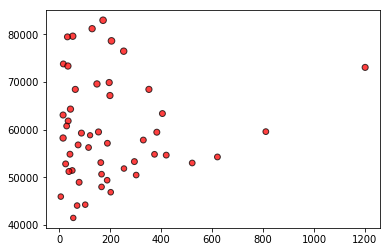

In [16]:
plt.scatter(df['fastfood_qty'], df['income'], marker="o", facecolors="red", edgecolors="black",
            s=df['professional'], alpha=0.75)